In [1]:
import sys; sys.path.append('../')

In [2]:
open_ai_api= open("../openai_api_key.key", "r").read()
from agents import Agent, OpenAIChatGPT, set_global_llm, set_live_verbosity

set_live_verbosity(2)
openai_llm = OpenAIChatGPT(
    api_key=open_ai_api,
    model="gpt-4o-mini",
    temperature=0.7,
    top_p=0.9,
    max_tokens=2000
)

set_global_llm(openai_llm)

/Users/voldemort/Desktop/personal_projects/arc-mlu/notebooks/../notebooks/arc_helper.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


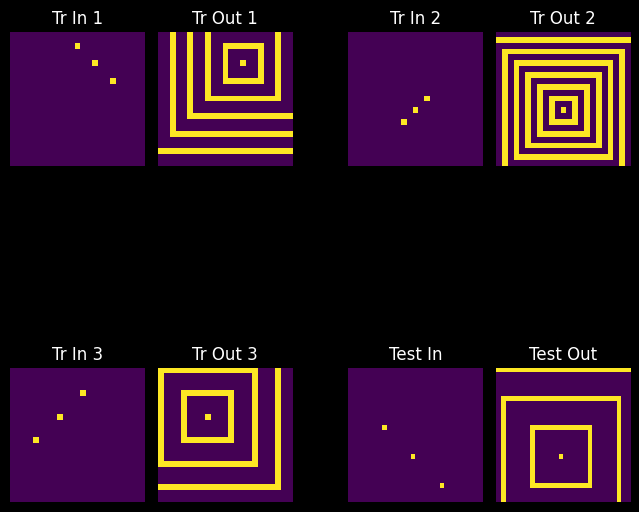

In [3]:
from notebooks.arc_helper import (convert_json_format, generate_string,
                                  plot_sample_matrices)

directory = "./ARC-800-tasks/training"  # Change this to your actual directory path
converted_data = convert_json_format(directory)
data=generate_string(converted_data)
plot_sample_matrices(converted_data[4])

In [4]:
from mlu import MLU

mlu = MLU(main_role="""
                    The goal is to construct the output grid(s) corresponding to the test input grid(s), 
                    using 3 trials for each test input. 'Constructing the output grid' involves picking 
                    the height and width of the output grid, then filling each cell in the grid with a symbol 
                    (integer between 0 and 9, which are visualized as colors). Learn to figure out the 
                    transformation rules and logic of image(matrix) from few given examples and apply it 
                    to the final test image(matrix). Analyze the given examples and predict the final 
                    image(matrix) for the given test image(matrix) and understand how to learn the 
                    transformation rules and logic of image(matrix) from few given examples to apply it 
                    to the final test image(matrix).
                    """,
    collection_name="knowledge_base_v-0.1",
    compress_knowledge=True,
    retrival_limit=15,
)

In [ ]:
from train_test_helper import train_and_evaluate

from logical_agents import logic_concept_reasoning_network

reasoning_iterations=4
reasoning_agent=lambda prompt: logic_concept_reasoning_network(f"{prompt}", max_iterations=reasoning_iterations)

set_live_verbosity(2)

n = 10 # 10 
import random

selected_data = random.sample(data, n)

results, train_dtw_scores, test_dtw_scores=train_and_evaluate(
    dataset=selected_data,  
    mlu=mlu,
    prompt_key="query",
    response_key="reply",
    epochs=1,
    test_size=0,
    train_batch_size=1,
    test_batch_size=1,
    initial_serial_items=1,
    logging=True,
    training_analysis_agent = reasoning_agent,
    testing_analysis_agent = reasoning_agent,
)


Starting Epoch 1



Training:   0%|          | 0/10 [00:00<?, ?it/s]

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🤖 Agent: SearchAgent                                                                                           │
│ ├── ⏩ Input:                                                                                                   │
│ │   ├── Query: if image_1:                                                                                      │
│ │   ├── [[0, 0, 5, 0, 0, 0, 0, 5, 0, 0], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0], [5, 5, │
│ │   │   5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0], [0, 0, 5, 0,   │
│ │   │   0, 0, 0, 5, 0, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0], [0, 0, 5, 0, 0, 0,   │
│ │   │   0, 5, 0, 0]] is transformed as                                                                          │
│ │   ├── [[1, 1, 5, 0, 0, 0, 0, 5, 0, 0], [1, 1, 5, 0, 0, 0, 0, 5, 0, 0], [1, 1, 5, 0, 0, 0, 0, 5, 0, 0], [5, 5, │
│ │   │   5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 5, 2, 2, 2, 2, 5, 0, 0], [0, 0, 5, 2, 2, 2, 2, 5, 0, 0], [0, 0, 5, 2,   │
│ │   │   2, 2, 2, 5, 0, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 5, 0, 0, 0, 0, 5, 3, 3], [0, 0, 5, 0, 0, 0,   │
│ │   │   0, 5, 3, 3]]                                                                                            │
│ │   ├── if image_2:                                                                                             │
│ │   ├── [[0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [5, 5, │
│ │   │   5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [5, 5, 5, 5,   │
│ │   │   5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0,   │
│ │   │   0, 0, 5, 0]] is transformed as                                                                          │
│ │   ├── [[1, 1, 1, 5, 0, 0, 0, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [5, 5, │
│ │   │   5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 2, 2, 2, 2, 5, 0], [0, 0, 0, 5, 2, 2, 2, 2, 5, 0], [5, 5, 5, 5,   │
│ │   │   5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0,   │
│ │   │   0, 0, 5, 3]]                                                                                            │
│ │   ├── if image_3:                                                                                             │
│ │   ├── [[0, 5, 0, 0, 5, 0, 5, 0, 5, 0], [0, 5, 0, 0, 5, 0, 5, 0, 5, 0], [0, 5, 0, 0, 5, 0, 5, 0, 5, 0], [5, 5, │
│ │   │   5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 0, 5, 0, 5, 0, 5, 0], [0, 5, 0, 0, 5, 0, 5, 0, 5, 0], [5, 5, 5, 5,   │
│ │   │   5, 5, 5, 5, 5, 5], [0, 5, 0, 0, 5, 0, 5, 0, 5, 0], [0, 5, 0, 0, 5, 0, 5, 0, 5, 0], [0, 5, 0, 0, 5, 0,   │
│ │   │   5, 0, 5, 0]] is transformed as                                                                          │
│ │   ├── [[1, 5, 0, 0, 5, 0, 5, 0, 5, 0], [1, 5, 0, 0, 5, 0, 5, 0, 5, 0], [1, 5, 0, 0, 5, 0, 5, 0, 5, 0], [5, 5, │
│ │   │   5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 0, 5, 2, 5, 0, 5, 0], [0, 5, 0, 0, 5, 2, 5, 0, 5, 0], [5, 5, 5, 5,   │
│ │   │   5, 5, 5, 5, 5, 5], [0, 5, 0, 0, 5, 0, 5, 0, 5, 3], [0, 5, 0, 0, 5, 0, 5, 0, 5, 3], [0, 5, 0, 0, 5, 0,   │
│ │   │   5, 0, 5, 3]]                                                                                            │
│ │   ├── then what is                                                                                            │
│ │   ├── [[0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [0, 5, │
│ │   │   0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5,   │
│ │   │   5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0,   │
│ │   │   5, 0, 5, 0]]                                    

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🤖 Agent: MetaPromptAgent                                                                                       │
│ ├── ⏩ Input:                                                                                                   │
│ │   ├──                                                                                                         │
│ │   ├──         Main Goal:                                                                                      │
│ │   ├──                     The goal is to construct the output grid(s) corresponding to the test input         │
│ │   │   grid(s),                                                                                                │
│ │   ├──                     using 3 trials for each test input. 'Constructing the output grid' involves picking │
│ │   ├──                     the height and width of the output grid, then filling each cell in the grid with a  │
│ │   │   symbol                                                                                                  │
│ │   ├──                     (integer between 0 and 9, which are visualized as colors). Learn to figure out the  │
│ │   ├──                     transformation rules and logic of image(matrix) from few given examples and apply   │
│ │   │   it                                                                                                      │
│ │   ├──                     to the final test image(matrix). Analyze the given examples and predict the final   │
│ │   ├──                     image(matrix) for the given test image(matrix) and understand how to learn the      │
│ │   ├──                     transformation rules and logic of image(matrix) from few given examples to apply it │
│ │   ├──                     to the final test image(matrix).                                                    │
│ │   ├──                                                                                                         │
│ │   ├──         Task: if image_1:                                                                               │
│ │   ├── [[0, 0, 5, 0, 0, 0, 0, 5, 0, 0], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0], [5, 5, │
│ │   │   5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0], [0, 0, 5, 0,   │
│ │   │   0, 0, 0, 5, 0, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0], [0, 0, 5, 0, 0, 0,   │
│ │   │   0, 5, 0, 0]] is transformed as                                                                          │
│ │   ├── [[1, 1, 5, 0, 0, 0, 0, 5, 0, 0], [1, 1, 5, 0, 0, 0, 0, 5, 0, 0], [1, 1, 5, 0, 0, 0, 0, 5, 0, 0], [5, 5, │
│ │   │   5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 5, 2, 2, 2, 2, 5, 0, 0], [0, 0, 5, 2, 2, 2, 2, 5, 0, 0], [0, 0, 5, 2,   │
│ │   │   2, 2, 2, 5, 0, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 5, 0, 0, 0, 0, 5, 3, 3], [0, 0, 5, 0, 0, 0,   │
│ │   │   0, 5, 3, 3]]                                                                                            │
│ │   ├── if image_2:                                                                                             │
│ │   ├── [[0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [5, 5, │
│ │   │   5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [5, 5, 5, 5,   │
│ │   │   5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0,   │
│ │   │   0, 0, 5, 0]] is transformed as                                                                          │
│ │   ├── [[1, 1, 1, 5, 0, 0, 0, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [5, 5, │
│ │   │   5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 2, 2, 2, 2, 5, 0], [0, 0, 0, 5, 2, 2, 2, 2, 5, 0], [5, 5, 5, 5,   │
│ │   │   5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 0, 5, 0

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🤖 Agent: ConceptAnalyzer                                                                                       │
│ ├── ⏩ Input:                                                                                                   │
│ │   ├── Problem: You are an Operational Agent tasked with constructing output grids corresponding to the        │
│ │   │   provided test input grids through three trials for each input. Your role involves analyzing             │
│ │   │   transformation rules and logic from given example grids and applying these rules to predict the final   │
│ │   │   output grid.                                                                                            │
│ │   ├──                                                                                                         │
│ │   ├── Your responsibilities include:                                                                          │
│ │   ├── 1. Understanding the dimensions of the output grid based on the input grid's characteristics.           │
│ │   ├── 2. Filling each cell in the output grid with integers (0-9) that correspond to specific visualized      │
│ │   │   colors, based on the learned transformation rules.                                                      │
│ │   ├── 3. Analyzing the examples provided to identify patterns in how input grids are transformed into output  │
│ │   │   grids.                                                                                                  │
│ │   ├──                                                                                                         │
│ │   ├── For the current task:                                                                                   │
│ │   ├── - Given the test input grid, analyze it in relation to the examples of transformations you have         │
│ │   │   learned.                                                                                                │
│ │   ├── - Determine the height and width for the output grid that corresponds to the input grid.                │
│ │   ├── - Fill in the output grid based on the transformation logic observed in previous examples.              │
│ │   ├──                                                                                                         │
│ │   ├── For the test input grid:                                                                                │
│ │   ├── [[0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [0, 5, │
│ │   │   0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5,   │
│ │   │   5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0,   │
│ │   │   5, 0, 5, 0]], your task is to determine how it is transformed based on previous examples.               │
│ │   └── Previous reasoning: []                                                                                  │
│ └── 🗒️ Output:                                                                                                   │
│     ├── concepts: [{'name': 'Output Grid', 'definition': 'The final grid that is constructed based on the       │
│     │   transformation rules applied to the input grid. It contains integers that represent specific colors.'}, │
│     │   {'name': 'Input Grid', 'definition': 'The initial grid provided for analysis, which is transformed into │
│     │   the output grid according to certain rules.'}, {'name': 'Transformation Rules', 'definition': 'The set  │
│     │   of logic and patterns derived from analyzing previous example grids that dictate how the input grid is  │
│     │   converted into the output grid.'}, {'name': 'Grid Dimensions', 'definition': 'The height and width of   │
│     │   the grid, which are determined based on the cha

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🤖 Agent: LogicalReasoner                                                                                       │
│ ├── ⏩ Input:                                                                                                   │
│ │   ├── Problem: You are an Operational Agent tasked with constructing output grids corresponding to the        │
│ │   │   provided test input grids through three trials for each input. Your role involves analyzing             │
│ │   │   transformation rules and logic from given example grids and applying these rules to predict the final   │
│ │   │   output grid.                                                                                            │
│ │   ├──                                                                                                         │
│ │   ├── Your responsibilities include:                                                                          │
│ │   ├── 1. Understanding the dimensions of the output grid based on the input grid's characteristics.           │
│ │   ├── 2. Filling each cell in the output grid with integers (0-9) that correspond to specific visualized      │
│ │   │   colors, based on the learned transformation rules.                                                      │
│ │   ├── 3. Analyzing the examples provided to identify patterns in how input grids are transformed into output  │
│ │   │   grids.                                                                                                  │
│ │   ├──                                                                                                         │
│ │   ├── For the current task:                                                                                   │
│ │   ├── - Given the test input grid, analyze it in relation to the examples of transformations you have         │
│ │   │   learned.                                                                                                │
│ │   ├── - Determine the height and width for the output grid that corresponds to the input grid.                │
│ │   ├── - Fill in the output grid based on the transformation logic observed in previous examples.              │
│ │   ├──                                                                                                         │
│ │   ├── For the test input grid:                                                                                │
│ │   ├── [[0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [0, 5, │
│ │   │   0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5,   │
│ │   │   5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0,   │
│ │   │   5, 0, 5, 0]], your task is to determine how it is transformed based on previous examples.               │
│ │   └── Previous reasoning: [ReasoningStep(concepts=[Concept(name='Output Grid', definition='The final grid     │
│ │       that is constructed based on the transformation rules applied to the input grid. It contains integers   │
│ │       that represent specific colors.'), Concept(name='Input Grid', definition='The initial grid provided for │
│ │       analysis, which is transformed into the output grid according to certain rules.'),                      │
│ │       Concept(name='Transformation Rules', definition='The set of logic and patterns derived from analyzing   │
│ │       previous example grids that dictate how the input grid is converted into the output grid.'),            │
│ │       Concept(name='Grid Dimensions', definition='The height and width of the grid, which are determined      │
│ │       based on the characteristics of the input grid.'), Concept(name='Cell Filling Logic', definition='The   │
│ │       process of populating each cell in the output gr

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🤖 Agent: SolutionFormulator                                                                                    │
│ ├── ⏩ Input:                                                                                                   │
│ │   ├── Problem: You are an Operational Agent tasked with constructing output grids corresponding to the        │
│ │   │   provided test input grids through three trials for each input. Your role involves analyzing             │
│ │   │   transformation rules and logic from given example grids and applying these rules to predict the final   │
│ │   │   output grid.                                                                                            │
│ │   ├──                                                                                                         │
│ │   ├── Your responsibilities include:                                                                          │
│ │   ├── 1. Understanding the dimensions of the output grid based on the input grid's characteristics.           │
│ │   ├── 2. Filling each cell in the output grid with integers (0-9) that correspond to specific visualized      │
│ │   │   colors, based on the learned transformation rules.                                                      │
│ │   ├── 3. Analyzing the examples provided to identify patterns in how input grids are transformed into output  │
│ │   │   grids.                                                                                                  │
│ │   ├──                                                                                                         │
│ │   ├── For the current task:                                                                                   │
│ │   ├── - Given the test input grid, analyze it in relation to the examples of transformations you have         │
│ │   │   learned.                                                                                                │
│ │   ├── - Determine the height and width for the output grid that corresponds to the input grid.                │
│ │   ├── - Fill in the output grid based on the transformation logic observed in previous examples.              │
│ │   ├──                                                                                                         │
│ │   ├── For the test input grid:                                                                                │
│ │   ├── [[0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [0, 5, │
│ │   │   0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5,   │
│ │   │   5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0,   │
│ │   │   5, 0, 5, 0]], your task is to determine how it is transformed based on previous examples.               │
│ │   └── Reasoning steps: [ReasoningStep(concepts=[Concept(name='Output Grid', definition='The final grid that   │
│ │       is constructed based on the transformation rules applied to the input grid. It contains integers that   │
│ │       represent specific colors.'), Concept(name='Input Grid', definition='The initial grid provided for      │
│ │       analysis, which is transformed into the output grid according to certain rules.'),                      │
│ │       Concept(name='Transformation Rules', definition='The set of logic and patterns derived from analyzing   │
│ │       previous example grids that dictate how the input grid is converted into the output grid.'),            │
│ │       Concept(name='Grid Dimensions', definition='The height and width of the grid, which are determined      │
│ │       based on the characteristics of the input grid.'), Concept(name='Cell Filling Logic', definition='The   │
│ │       process of populating each cell in the output gr

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🤖 Agent: ValidityChecker                                                                                       │
│ ├── ⏩ Input:                                                                                                   │
│ │   ├── Problem: You are an Operational Agent tasked with constructing output grids corresponding to the        │
│ │   │   provided test input grids through three trials for each input. Your role involves analyzing             │
│ │   │   transformation rules and logic from given example grids and applying these rules to predict the final   │
│ │   │   output grid.                                                                                            │
│ │   ├──                                                                                                         │
│ │   ├── Your responsibilities include:                                                                          │
│ │   ├── 1. Understanding the dimensions of the output grid based on the input grid's characteristics.           │
│ │   ├── 2. Filling each cell in the output grid with integers (0-9) that correspond to specific visualized      │
│ │   │   colors, based on the learned transformation rules.                                                      │
│ │   ├── 3. Analyzing the examples provided to identify patterns in how input grids are transformed into output  │
│ │   │   grids.                                                                                                  │
│ │   ├──                                                                                                         │
│ │   ├── For the current task:                                                                                   │
│ │   ├── - Given the test input grid, analyze it in relation to the examples of transformations you have         │
│ │   │   learned.                                                                                                │
│ │   ├── - Determine the height and width for the output grid that corresponds to the input grid.                │
│ │   ├── - Fill in the output grid based on the transformation logic observed in previous examples.              │
│ │   ├──                                                                                                         │
│ │   ├── For the test input grid:                                                                                │
│ │   ├── [[0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [0, 5, │
│ │   │   0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5,   │
│ │   │   5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0,   │
│ │   │   5, 0, 5, 0]], your task is to determine how it is transformed based on previous examples.               │
│ │   ├── Reasoning steps: [ReasoningStep(concepts=[Concept(name='Output Grid', definition='The final grid that   │
│ │   │   is constructed based on the transformation rules applied to the input grid. It contains integers that   │
│ │   │   represent specific colors.'), Concept(name='Input Grid', definition='The initial grid provided for      │
│ │   │   analysis, which is transformed into the output grid according to certain rules.'),                      │
│ │   │   Concept(name='Transformation Rules', definition='The set of logic and patterns derived from analyzing   │
│ │   │   previous example grids that dictate how the input grid is converted into the output grid.'),            │
│ │   │   Concept(name='Grid Dimensions', definition='The height and width of the grid, which are determined      │
│ │   │   based on the characteristics of the input grid.'), Concept(name='Cell Filling Logic', definition='The   │
│ │   │   process of populating each cell in the output gr

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 🤖 Agent: SearchAgent                                                                                           │
│ ├── ⏩ Input:                                                                                                   │
│ │   ├── Query:                                                                                                  │
│ │   ├──         Main Goal:                                                                                      │
│ │   ├──                     The goal is to construct the output grid(s) corresponding to the test input         │
│ │   │   grid(s),                                                                                                │
│ │   ├──                     using 3 trials for each test input. 'Constructing the output grid' involves picking │
│ │   ├──                     the height and width of the output grid, then filling each cell in the grid with a  │
│ │   │   symbol                                                                                                  │
│ │   ├──                     (integer between 0 and 9, which are visualized as colors). Learn to figure out the  │
│ │   ├──                     transformation rules and logic of image(matrix) from few given examples and apply   │
│ │   │   it                                                                                                      │
│ │   ├──                     to the final test image(matrix). Analyze the given examples and predict the final   │
│ │   ├──                     image(matrix) for the given test image(matrix) and understand how to learn the      │
│ │   ├──                     transformation rules and logic of image(matrix) from few given examples to apply it │
│ │   ├──                     to the final test image(matrix).                                                    │
│ │   ├──                                                                                                         │
│ │   ├──         Task: if image_1:                                                                               │
│ │   ├── [[0, 0, 5, 0, 0, 0, 0, 5, 0, 0], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0], [5, 5, │
│ │   │   5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0], [0, 0, 5, 0,   │
│ │   │   0, 0, 0, 5, 0, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0], [0, 0, 5, 0, 0, 0,   │
│ │   │   0, 5, 0, 0]] is transformed as                                                                          │
│ │   ├── [[1, 1, 5, 0, 0, 0, 0, 5, 0, 0], [1, 1, 5, 0, 0, 0, 0, 5, 0, 0], [1, 1, 5, 0, 0, 0, 0, 5, 0, 0], [5, 5, │
│ │   │   5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 5, 2, 2, 2, 2, 5, 0, 0], [0, 0, 5, 2, 2, 2, 2, 5, 0, 0], [0, 0, 5, 2,   │
│ │   │   2, 2, 2, 5, 0, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 5, 0, 0, 0, 0, 5, 3, 3], [0, 0, 5, 0, 0, 0,   │
│ │   │   0, 5, 3, 3]]                                                                                            │
│ │   ├── if image_2:                                                                                             │
│ │   ├── [[0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [5, 5, │
│ │   │   5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [5, 5, 5, 5,   │
│ │   │   5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0,   │
│ │   │   0, 0, 5, 0]] is transformed as                                                                          │
│ │   ├── [[1, 1, 1, 5, 0, 0, 0, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 0, 5, 0], [5, 5, │
│ │   │   5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 2, 2, 2, 2, 5, 0], [0, 0, 0, 5, 2, 2, 2, 2, 5, 0], [5, 5, 5, 5,   │
│ │   │   5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 0, 5, 0

Training:   0%|          | 0/10 [00:29<?, ?it/s]


TypeError: 'NoneType' object is not callable

In [ ]:
print(train_dtw_scores, test_dtw_scores)